##**Project Title:**
Customer Segmentation with K-Means Clustering

(boost your problem-solving skills and prepare you for real-world challenges)

In [2]:
data = """
customer_id,annual_spending,frequency,avg_basket_size,country
1001,3200,25,4,US
1002,1500,12,2,CA
1003,8000,60,7,UK
1004,400,5,1,US
1005,2100,19,3,DE
1006,6000,40,5,IN
1007,1000,10,2,CA
1008,9000,80,9,UK
1009,350,6,1,DE
1010,5000,35,4,IN
"""

import pandas as pd
from io import StringIO
df = pd.read_csv(StringIO(data))
display(df)

,customer_id,annual_spending,frequency,avg_basket_size,country
0,1001,3200,25,4,US
1,1002,1500,12,2,CA
2,1003,8000,60,7,UK
3,1004,400,5,1,US
4,1005,2100,19,3,DE
5,1006,6000,40,5,IN
6,1007,1000,10,2,CA
7,1008,9000,80,9,UK
8,1009,350,6,1,DE
9,1010,5000,35,4,IN


In [3]:
df.isnull().sum()

,0
customer_id,0
annual_spending,0
frequency,0
avg_basket_size,0
country,0


**Step 1: Handling missing values**

In [4]:
# add binary columns indicate missingness
for col in df.columns:
  if df[col].isnull().any():
    df[f'{col}_is_missing'] = df[col].isnull().astype(int)
  print(df.head())

   customer_id  annual_spending  frequency  avg_basket_size country
0         1001             3200         25                4      US
1         1002             1500         12                2      CA
2         1003             8000         60                7      UK
3         1004              400          5                1      US
4         1005             2100         19                3      DE
   customer_id  annual_spending  frequency  avg_basket_size country
0         1001             3200         25                4      US
1         1002             1500         12                2      CA
2         1003             8000         60                7      UK
3         1004              400          5                1      US
4         1005             2100         19                3      DE
   customer_id  annual_spending  frequency  avg_basket_size country
0         1001             3200         25                4      US
1         1002             1500         12      

In [5]:
# fill in numerical columns, use median
num_cols = ['annual_spending', 'frequency', 'avg_basket_size']
for col in num_cols:
  if df[col].isnull().any():
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


In [6]:
# fill in categorical columns, use mode
cat_cols = ['country']
for col in cat_cols:
  if df[col].isnull().any():
    df[col].fillna(df[col].mode().iloc[0], inplace=True)


In [7]:
df

,customer_id,annual_spending,frequency,avg_basket_size,country
0,1001,3200,25,4,US
1,1002,1500,12,2,CA
2,1003,8000,60,7,UK
3,1004,400,5,1,US
4,1005,2100,19,3,DE
5,1006,6000,40,5,IN
6,1007,1000,10,2,CA
7,1008,9000,80,9,UK
8,1009,350,6,1,DE
9,1010,5000,35,4,IN


In [8]:
# review results
print("Missing values after imputaion: ", df.isnull().sum())

Missing values after imputaion:  customer_id        0
annual_spending    0
frequency          0
avg_basket_size    0
country            0
dtype: int64


In [9]:
# Save the processed data
# for the next step
df.to_csv('customer_cleaned.csv', index=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac5fad5efd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac5fad743d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac5fad37b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ac5fad75910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ac5fad76250>],
 'means': []}

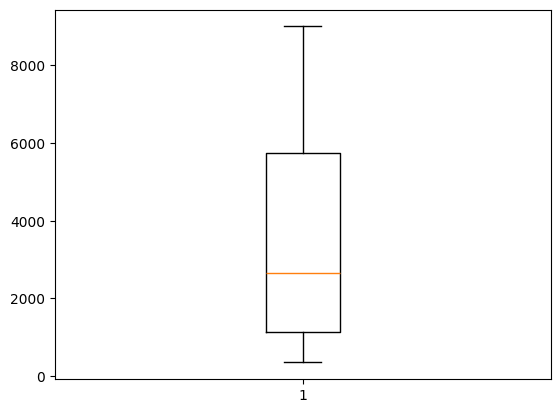

In [10]:
# Handle outliers by visualizing
import matplotlib.pyplot as plt
plt.boxplot(df['annual_spending'])

In [11]:
# handle inconsistent data
df['country'].unique()

array(['US', 'CA', 'UK', 'DE', 'IN'], dtype=object)

In [12]:
pd.get_dummies(df['country'])

,CA,DE,IN,UK,US
0,False,False,False,False,True
1,True,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,True,False,False,False
5,False,False,True,False,False
6,True,False,False,False,False
7,False,False,False,True,False
8,False,True,False,False,False
9,False,False,True,False,False


In [13]:
# handle inconsistent country names
country_map = {
    "USA": "US",
    "United States": "US",
    "Uk": "UK",
    "Deutschhland": "DE",
    "India": "IN"
}

df["country_clean"] = df['country'].replace(country_map).str.upper()

# handle outliers: winsorize
def winsorize(s):
  q1, q3 = s.quantile([0.25, 0.75])
  iqr = q3 - q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  return s.clip(lower, upper)

for col in df[num_cols]:
  df[col] = winsorize(df[col])

In [14]:
df

,customer_id,annual_spending,frequency,avg_basket_size,country,country_clean
0,1001,3200,25,4.000,US,US
1,1002,1500,12,2.000,CA,CA
2,1003,8000,60,7.000,UK,UK
3,1004,400,5,1.000,US,US
4,1005,2100,19,3.000,DE,DE
5,1006,6000,40,5.000,IN,IN
6,1007,1000,10,2.000,CA,CA
7,1008,9000,80,8.875,UK,UK
8,1009,350,6,1.000,DE,DE
9,1010,5000,35,4.000,IN,IN


In [15]:
# one-hot encoding country
country_counts = df['country_clean'].value_counts()
country_counts
rare_country = country_counts[country_counts < 2].index
rare_country
df["country_grouped"] = df['country_clean'].replace({c: "OTHER" for c in rare_country})
df["country_grouped"]

,country_grouped
0,US
1,CA
2,UK
3,US
4,DE
5,IN
6,CA
7,UK
8,DE
9,IN


In [16]:
df = pd.get_dummies(df, columns=['country_grouped'])

In [17]:
df

,customer_id,annual_spending,frequency,avg_basket_size,country,country_clean,country_grouped_CA,country_grouped_DE,country_grouped_IN,country_grouped_UK,country_grouped_US
0,1001,3200,25,4.000,US,US,False,False,False,False,True
1,1002,1500,12,2.000,CA,CA,True,False,False,False,False
2,1003,8000,60,7.000,UK,UK,False,False,False,True,False
3,1004,400,5,1.000,US,US,False,False,False,False,True
4,1005,2100,19,3.000,DE,DE,False,True,False,False,False
5,1006,6000,40,5.000,IN,IN,False,False,True,False,False
6,1007,1000,10,2.000,CA,CA,True,False,False,False,False
7,1008,9000,80,8.875,UK,UK,False,False,False,True,False
8,1009,350,6,1.000,DE,DE,False,True,False,False,False
9,1010,5000,35,4.000,IN,IN,False,False,True,False,False


**Still in step 2: Scale numerical features for K-Means.**

In [18]:
for col in df.columns:
  if df[col].dtypes == 'bool':
    df[col] = df[col].astype(int)

In [19]:
# define onehot_cols
onehot_cols = [col for col in df.columns if col.startswith('country_grouped_')]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [21]:
# combine num and onehot
#  into 1 column which will be the features
feature_cols = num_cols + onehot_cols
feature_cols

['annual_spending',
 'frequency',
 'avg_basket_size',
 'country_grouped_CA',
 'country_grouped_DE',
 'country_grouped_IN',
 'country_grouped_UK',
 'country_grouped_US']

In [22]:
# assign X
X = df[feature_cols].values
X

array([[-0.15117009, -0.17764743,  0.0865266 ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-0.71598142, -0.72750852, -0.72784141,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.44359131,  1.30274781,  1.30807861,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-1.08144757, -1.02358756, -1.13502541,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-0.51663624, -0.43142947, -0.3206574 ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.77910739,  0.45680767,  0.49371061,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [-0.8821024 , -0.81210253, -0.72784141,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.77583326,  2.14868794,  2.07154862,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-1.09805967, -0.98129056

In [23]:
# debugging step
print(df.columns)

Index(['customer_id', 'annual_spending', 'frequency', 'avg_basket_size',
       'country', 'country_clean', 'country_grouped_CA', 'country_grouped_DE',
       'country_grouped_IN', 'country_grouped_UK', 'country_grouped_US'],
      dtype='object')


**Step 3: Exploratory Data Analysis (EDA)**
- Visualize distributions and relationships.
- Use pairplots, histograms, and boxplots.

MY QUESTION
- how to visualize distribution, relationship, choose which columns to be the most important distribution and relationship
- how to know which kind of visualization
- why pairplot
- why histogram
- why boxplot

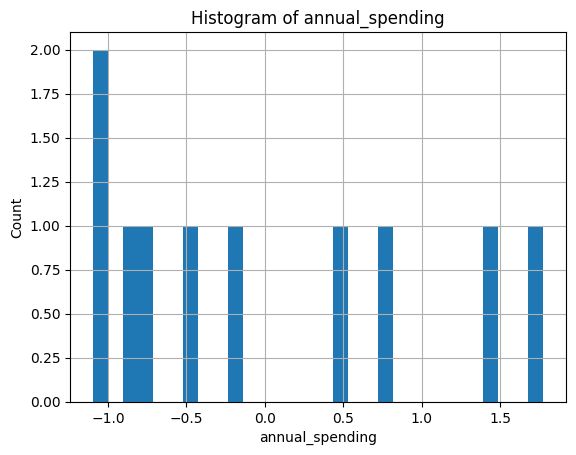

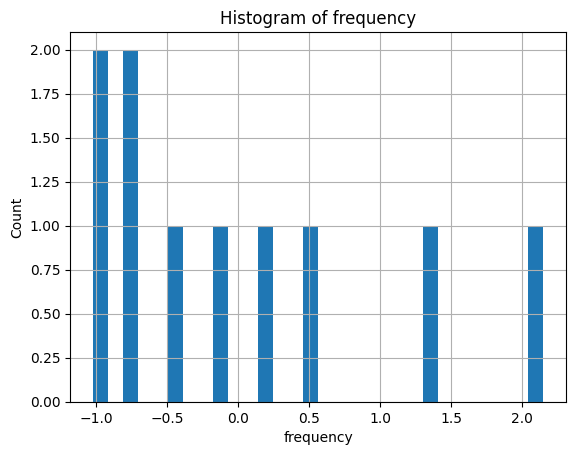

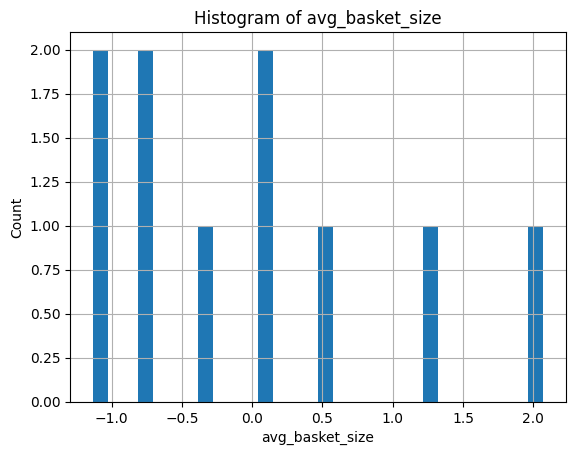

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# histogram: see the distribution of each numerical cols
for col in num_cols:
  plt.figure()
  df[col].hist(bins=30)
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

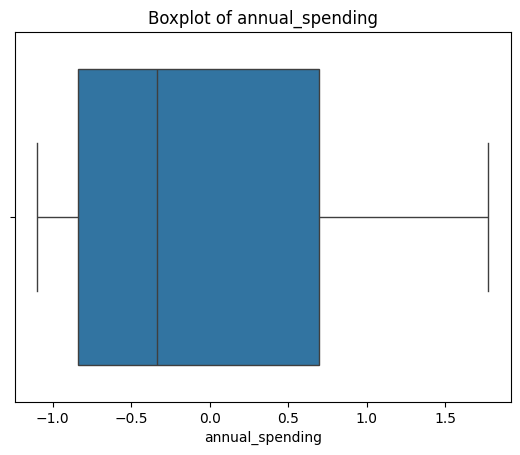

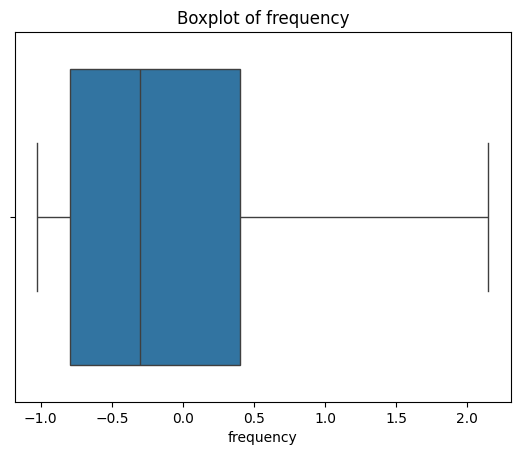

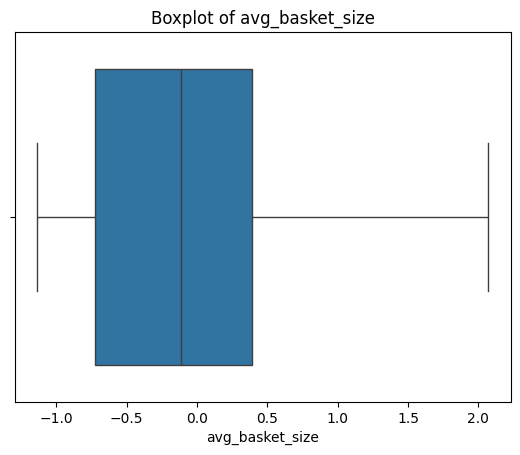

In [25]:
# Boxplot: see outlier and spread for each numerical cols
for col in num_cols:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)
  plt.show()

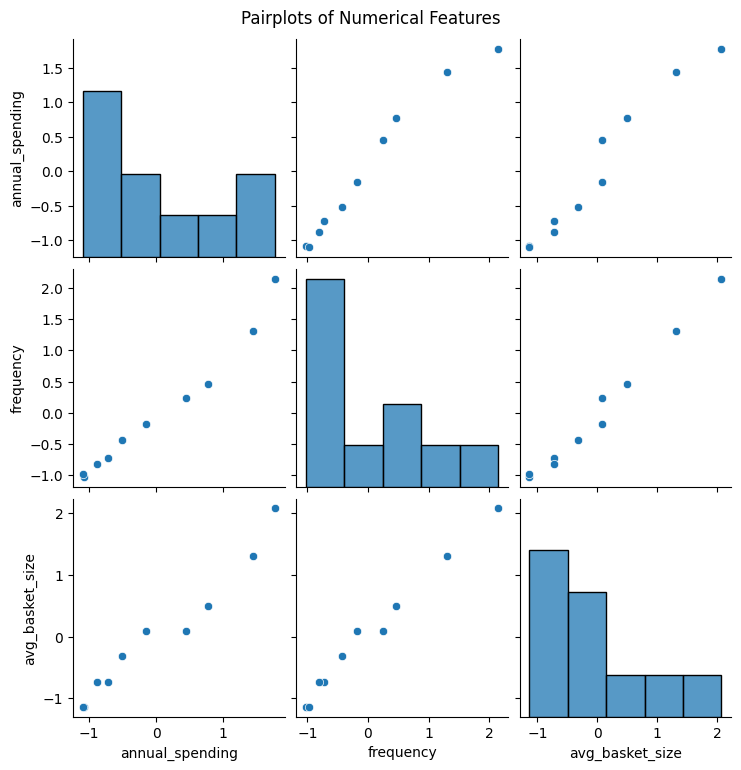

In [26]:
# pairplots: see relationship btw all pairs of numerical cols
sns.pairplot(df[num_cols])
plt.suptitle("Pairplots of Numerical Features", y=1.02)
plt.show()

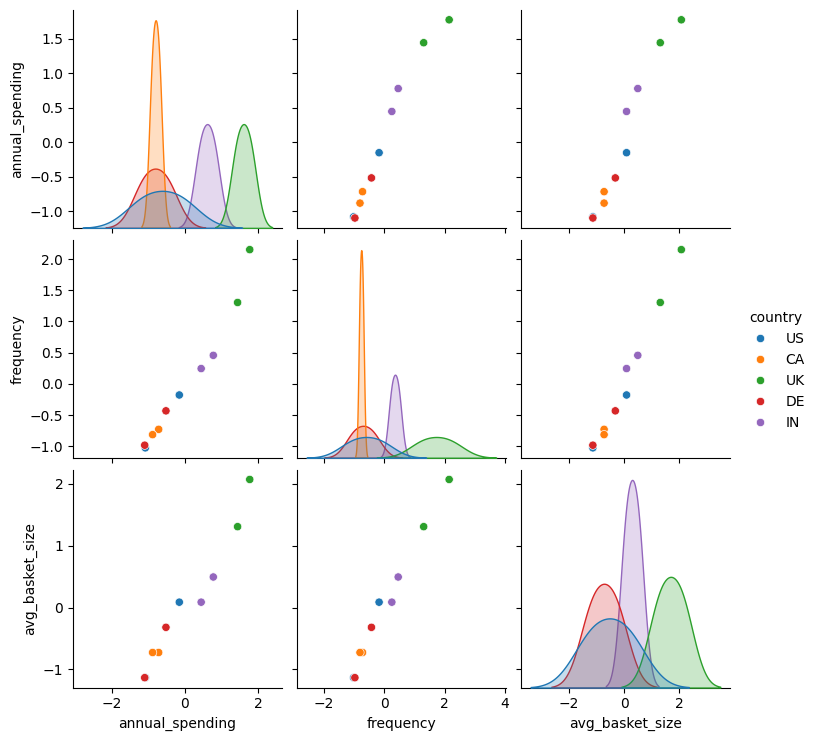

In [27]:
# color by country
sns.pairplot(df, vars=num_cols, hue='country')

it only looks captivating but being kinda messy to look for patterns or to figure out which country

**Step 4: K-Means Clustering**
- Use K-Means to segment customers.
- Determine the optimal number of clusters using the elbow method and silhouette score.
- Assign each customer to a cluster.


my question:
- what is elbow method, what is silhouette score
- how to differentiate kmeans and knn
- how to find the optimal number of clusters, when we know that this number of clusters is inefficient
- if need to manually visualize this process, can I?


DANG DEN DAY!!!
TI VE XEM VIDEO VE SIL VA ELBOW

In [28]:
# import needed lib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
# Step 4.1. find kmeans
inertia = []
sil_score = []
K = range(2, min(11, X.shape[0]))

for k in K:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  labels = kmeans.fit_predict(X)
  inertia.append(kmeans.inertia_)
  sil_score.append(silhouette_score(X, labels))

Text(0.5, 1.0, 'Elbow method')

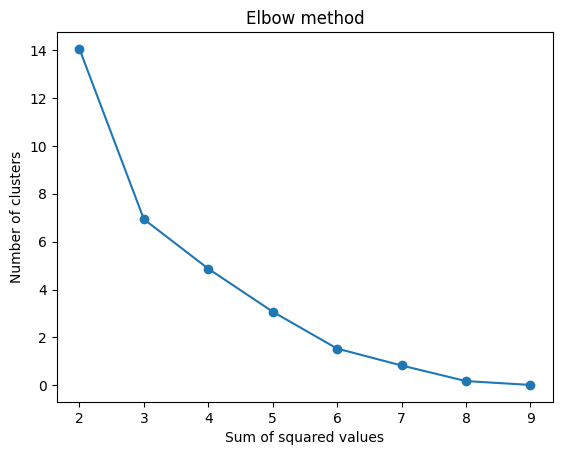

In [37]:
# plot elbow silo
plt.figure()
plt.plot(K, inertia, marker='o')
plt.xlabel("Sum of squared values")
plt.ylabel("Number of clusters")
plt.title("Elbow method")

Text(0.5, 1.0, 'Silhouette method')

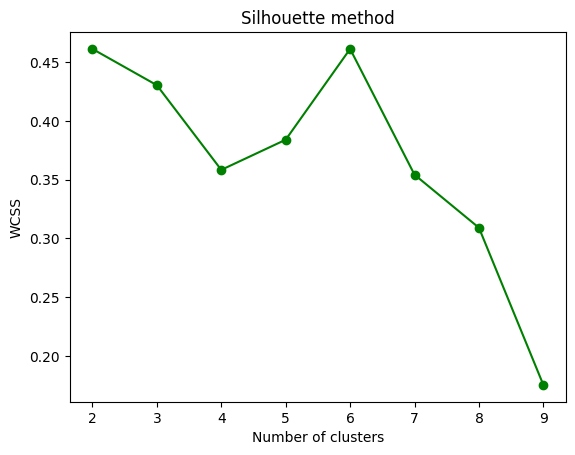

In [40]:
# plot elbow silo
plt.figure()
plt.plot(K, sil_score, marker='o', color='green')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Silhouette method")

In [45]:
# step 4.2: find optimal k
optimal_k = K[sil_score.index(max(sil_score))]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 6


In [46]:
# step 4.3. fit final kmeans
final_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['cluster'] = final_kmeans.fit_predict(X)

In [48]:
# save again to csv
df.to_csv("customer_clusters.csv", index=False)
print("Clusters assignments saved to customer_clusters.csv")

print("\nCluster Means: ")
print(df.groupby('cluster')[feature_cols].mean())

Clusters assignments saved to customer_clusters.csv

Cluster Means: 
         annual_spending  frequency  avg_basket_size  country_grouped_CA  \
cluster                                                                    
0              -1.081448  -1.023588        -1.135025                 0.0   
1               0.612986   0.351065         0.290119                 0.0   
2              -0.799042  -0.769806        -0.727841                 1.0   
3               1.609712   1.725718         1.689814                 0.0   
4              -0.807348  -0.706360        -0.727841                 0.0   
5              -0.151170  -0.177647         0.086527                 0.0   

         country_grouped_DE  country_grouped_IN  country_grouped_UK  \
cluster                                                               
0                       0.0                 0.0                 0.0   
1                       0.0                 1.0                 0.0   
2                       0.0           

**Step 5. Interpretation & Visualization**
- Visualize clusters (2D or 3D if possible).
- Profile each cluster: what are their typical behaviors?
- Suggest marketing strategies for each segment.

In [49]:
# import needed lib
from sklearn.decomposition import PCA

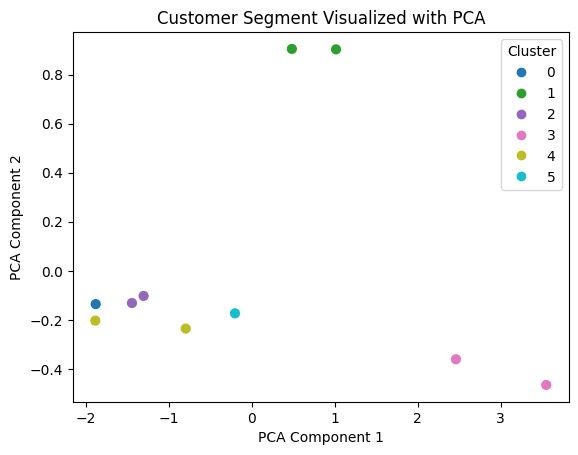

In [56]:
# visualize clusters
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

plt.figure()
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c=df['cluster'], cmap='tab10', s=40)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segment Visualized with PCA")
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

In [59]:
# profile clusters
# for numeric features
print(df.groupby('cluster')[feature_cols].mean())

# for categorical features
print(df.groupby('cluster')['country'].value_counts())

         annual_spending  frequency  avg_basket_size  country_grouped_CA  \
cluster                                                                    
0              -1.081448  -1.023588        -1.135025                 0.0   
1               0.612986   0.351065         0.290119                 0.0   
2              -0.799042  -0.769806        -0.727841                 1.0   
3               1.609712   1.725718         1.689814                 0.0   
4              -0.807348  -0.706360        -0.727841                 0.0   
5              -0.151170  -0.177647         0.086527                 0.0   

         country_grouped_DE  country_grouped_IN  country_grouped_UK  \
cluster                                                               
0                       0.0                 0.0                 0.0   
1                       0.0                 1.0                 0.0   
2                       0.0                 0.0                 0.0   
3                       0.0         

**Example Cluster Profiles & Strategies**

- Cluster 0:
  - Young, low spending, high digital engagement
  - Strategy: Push app-based promotions, gamified loyalty programs

- Cluster 1:
  - Older, high spending, prefer in-store shopping
  - Strategy: Personalized in-store VIP events, premium product offerings

- Cluster 2:
  - Middle-aged, moderate spending, responsive to email marketing
  - Strategy: Target email campaigns with exclusive online deals

**Step 6. Reflection**

Briefly discuss:

- Challenges you faced (feature scaling, categorical variables, cluster quality, etc.)
- How you would improve the project for a real company (more features, other clustering algorithms, etc.)


In [ ]:
p

Elbow Method:


rút kinh nghiệm:
1. focus vào core của algorithm trước đã
2. làm những bài beginner friendly trước đã
3. có khó thì độ khó trong tầm: nhưng xcái mình đã biết rồi, xong nghĩ khó thêm 1 chút thôi. chứ ko phải khó hơn hoàn toàn, khó tới độ chưa biết zì lun
